# Visualize Terrascope Sentinel-2 products


The Belgian Collaborative ground segment **TERRASCOPE** systematically processes Sentinel-2 L1C products into Surface Reflectance (TOC) and several biophysical parameters (NDVI, FAPAR, FCOVER, LAI) over Belgium. 

This notebook illustrates i) how to find the paths of different Sentinel-2 products (TOC, NDVI, FAPAR, FCOVER, LAI) for a cloudfree day over Belgium, ii) mosaic them using virtual raster files (vrt) and iii) visualize these. We use the 'reticulate' R library to access a Python library that supports finding locations of Sentinel-2 products on the MEP. Reusing this Python library ensures that R users can also benefit from everything that is implemented for Python users. 

More information on Terrascope and the Sentinel-2 products can be found at [www.terrascope.be](https://www.terrascope.be/)



# 1. Load libraries


In [1]:
library(raster)
library(gdalUtils)
library(reticulate)
use_python("/opt/rh/python27/root/usr/bin/python")

Loading required package: sp


In [2]:
#load catalog client
catalogclient <- import("catalogclient")
cat=catalogclient$catalog$Catalog()

#show all producttypes
cat$get_producttypes()

[1] "BioPar_ALB_BHV_V1_Tiles"        "BioPar_ALB_DHV_V1_Tiles"       
 [3] "BioPar_BA_V1_Tiles"             "BioPar_DMP_Tiles"              
 [5] "BioPar_FAPAR_V1_Tiles"          "BioPar_FAPAR_V1_Global"        
 [7] "BioPar_FAPAR_V2_Global"         "BioPar_FCOVER_V1_Tiles"        
 [9] "BioPar_FCOVER_V1_Global"        "BioPar_FCOVER_V2_Global"       
[11] "BioPar_LAI_V1_Tiles"            "BioPar_LAI_V1_Global"          
[13] "BioPar_LAI_V2_Global"           "BioPar_NDVI300_V1_Global"      
[15] "BioPar_BA300_V1_Global"         "BioPar_FCOVER300_V1_Global"    
[17] "BioPar_FAPAR300_V1_Global"      "BioPar_LAI300_V1_Global"       
[19] "BioPar_NDVI_V1_Tiles"           "BioPar_NDVI_V2_Tiles"          
[21] "BioPar_NDVI_V2_Global"          "BioPar_SWI"                    
[23] "BioPar_SWI10_V3_Global"         "BioPar_TOCR_Tiles"             
[25] "BioPar_VCI_Tiles"               "BioPar_VPI_Tiles"              
[27] "BioPar_WB_V1_Tiles"             "BioPar_WB_V2_Tiles"            
[29] "BioPar_WB_V2_Global"            "BioPar_WB300_V1_Global"        
[31] "PROBAV_L3_S1_TOC_1KM"           "PROBAV_L3_S1_TOC_333M"         
[33] "PROBAV_L3_S10_TOC_333M"         "PROBAV_L3_S5_TOC_100M"         
[35] "PROBAV_L3_S1_TOC_100M"          "PROBAV_L3_S10_TOC_1KM"         
[37] "PROBAV_L3_S1_TOA_1KM"           "PROBAV_L3_S1_TOA_333M"         
[39] "PROBAV_L3_S5_TOA_100M"          "PROBAV_L3_S1_TOA_100M"         
[41] "PROBAV_L1C"                     "PROBAV_L2A_1KM"                
[43] "PROBAV_L2A_333M"                "PROBAV_L2A_100M"               
[45] "CGS_S2_FAPAR"                   "CGS_S2_NDVI"                   
[47] "CGS_S2_LAI"                     "CGS_S2_FCOVER"                 
[49] "CGS_S2_RADIOMETRY"              "NEXTGEOSS_SENTINEL2_FAPAR"     
[51] "NEXTGEOSS_SENTINEL2_NDVI"       "NEXTGEOSS_SENTINEL2_LAI"       
[53] "NEXTGEOSS_SENTINEL2_FCOVER"     "NEXTGEOSS_SENTINEL2_RADIOMETRY"
[55] "FSTEP_SENTINEL2_FAPAR"          "FSTEP_SENTINEL2_NDVI"          
[57] "FSTEP_SENTINEL2_LAI"            "FSTEP_SENTINEL2_FCOVER"        
[59] "FSTEP_SENTINEL2_RADIOMETRY"     "SPOTVEGETATION_L3_S1"          
[61] "SPOTVEGETATION_L3_S10"

# 2. Get product paths

In [3]:
#first we import the python datetime package
datetime <- import("datetime")

#next we query the catalog for TOC, FCOVER, FAPAR, NDVI and LAI products on 2017-05-26
date = datetime$date(2017L, 5L, 26L)

#TOC
products_TOC = cat$get_products('CGS_S2_RADIOMETRY',
                            fileformat="GEOTIFF",
                            startdate=date, 
                            enddate=date)

#NDVI
products_NDVI= cat$get_products('CGS_S2_NDVI',
                            fileformat="GEOTIFF",
                            startdate=date, 
                            enddate=date)
#FAPAR
products_FAPAR= cat$get_products('CGS_S2_FAPAR',
                            fileformat="GEOTIFF",
                            startdate=date, 
                            enddate=date)

#FCOVER
products_FCOVER= cat$get_products('CGS_S2_FCOVER',
                            fileformat="GEOTIFF",
                            startdate=date, 
                            enddate=date)

#LAI
products_LAI= cat$get_products('CGS_S2_LAI',
                            fileformat="GEOTIFF",
                            startdate=date, 
                            enddate=date)



Next, we define a function to retrieve the paths to the different files which we will use for subsequent visualization. This path is stored in the *filename* attribute of the above _products_ variables. 

In [4]:
get_paths <- function(products,pattern){
    tmp <- sapply(products,FUN=function(x)(sapply(x$files,FUN=function(y)(y$filename))))
                                                  
    return(gsub("file:","",tmp[grep(pattern,tmp)]))
                                                  
}

This function is subsequently used to retrieve the paths. For the TOC products we extract the paths for the blue, green, red and NIR band.

In [5]:
#TOC
files_B2 <- get_paths(products_TOC,"B02")
files_B3 <- get_paths(products_TOC,"B03")
files_B4 <- get_paths(products_TOC,"B04")
files_B8 <- get_paths(products_TOC,"B08")
head(files_B2)

#NDVI
files_NDVI <- get_paths(products_NDVI,"NDVI")
head(files_NDVI)

#FAPAR
files_FAPAR <- get_paths(products_FAPAR,"FAPAR")
head(files_FAPAR)

#FCOVER
files_FCOVER <- get_paths(products_FCOVER,"FCOVER")
head(files_FCOVER)

#LAI
files_LAI <- get_paths(products_LAI,"LAI")
head(files_LAI)


[1] "/data/MTDA/CGS_S2_RADIOMETRY/2017/05/26/S2A_20170526T105518Z_31UES_TOC_V101/S2A_20170526T105518Z_31UES_TOC-B02_10M_V101.tif"
[2] "/data/MTDA/CGS_S2_RADIOMETRY/2017/05/26/S2A_20170526T105518Z_31UER_TOC_V101/S2A_20170526T105518Z_31UER_TOC-B02_10M_V101.tif"
[3] "/data/MTDA/CGS_S2_RADIOMETRY/2017/05/26/S2A_20170526T105518Z_31UET_TOC_V101/S2A_20170526T105518Z_31UET_TOC-B02_10M_V101.tif"
[4] "/data/MTDA/CGS_S2_RADIOMETRY/2017/05/26/S2A_20170526T105518Z_31UDS_TOC_V101/S2A_20170526T105518Z_31UDS_TOC-B02_10M_V101.tif"
[5] "/data/MTDA/CGS_S2_RADIOMETRY/2017/05/26/S2A_20170526T105518Z_31UFT_TOC_V101/S2A_20170526T105518Z_31UFT_TOC-B02_10M_V101.tif"
[6] "/data/MTDA/CGS_S2_RADIOMETRY/2017/05/26/S2A_20170526T105518Z_31UFQ_TOC_V101/S2A_20170526T105518Z_31UFQ_TOC-B02_10M_V101.tif"

[1] "/data/MTDA/CGS_S2_NDVI/2017/05/26/S2A_20170526T105518Z_31UGR_NDVI_V101/S2A_20170526T105518Z_31UGR_NDVI_10M_V101.tif"
[2] "/data/MTDA/CGS_S2_NDVI/2017/05/26/S2A_20170526T105518Z_31UDS_NDVI_V101/S2A_20170526T105518Z_31UDS_NDVI_10M_V101.tif"
[3] "/data/MTDA/CGS_S2_NDVI/2017/05/26/S2A_20170526T105518Z_31UER_NDVI_V101/S2A_20170526T105518Z_31UER_NDVI_10M_V101.tif"
[4] "/data/MTDA/CGS_S2_NDVI/2017/05/26/S2A_20170526T105518Z_31UFT_NDVI_V101/S2A_20170526T105518Z_31UFT_NDVI_10M_V101.tif"
[5] "/data/MTDA/CGS_S2_NDVI/2017/05/26/S2A_20170526T105518Z_31UFQ_NDVI_V101/S2A_20170526T105518Z_31UFQ_NDVI_10M_V101.tif"
[6] "/data/MTDA/CGS_S2_NDVI/2017/05/26/S2A_20170526T105518Z_31UGS_NDVI_V101/S2A_20170526T105518Z_31UGS_NDVI_10M_V101.tif"

[1] "/data/MTDA/CGS_S2_FAPAR/2017/05/26/S2A_20170526T105518Z_31UFT_FAPAR_V101/S2A_20170526T105518Z_31UFT_FAPAR_10M_V101.tif"
[2] "/data/MTDA/CGS_S2_FAPAR/2017/05/26/S2A_20170526T105518Z_31UER_FAPAR_V101/S2A_20170526T105518Z_31UER_FAPAR_10M_V101.tif"
[3] "/data/MTDA/CGS_S2_FAPAR/2017/05/26/S2A_20170526T105518Z_31UDS_FAPAR_V101/S2A_20170526T105518Z_31UDS_FAPAR_10M_V101.tif"
[4] "/data/MTDA/CGS_S2_FAPAR/2017/05/26/S2A_20170526T105518Z_31UFQ_FAPAR_V101/S2A_20170526T105518Z_31UFQ_FAPAR_10M_V101.tif"
[5] "/data/MTDA/CGS_S2_FAPAR/2017/05/26/S2A_20170526T105518Z_31UFS_FAPAR_V101/S2A_20170526T105518Z_31UFS_FAPAR_10M_V101.tif"
[6] "/data/MTDA/CGS_S2_FAPAR/2017/05/26/S2A_20170526T105518Z_31UET_FAPAR_V101/S2A_20170526T105518Z_31UET_FAPAR_10M_V101.tif"

[1] "/data/MTDA/CGS_S2_FCOVER/2017/05/26/S2A_20170526T105518Z_31UDS_FCOVER_V101/S2A_20170526T105518Z_31UDS_FCOVER_10M_V101.tif"
[2] "/data/MTDA/CGS_S2_FCOVER/2017/05/26/S2A_20170526T105518Z_31UGS_FCOVER_V101/S2A_20170526T105518Z_31UGS_FCOVER_10M_V101.tif"
[3] "/data/MTDA/CGS_S2_FCOVER/2017/05/26/S2A_20170526T105518Z_31UFQ_FCOVER_V101/S2A_20170526T105518Z_31UFQ_FCOVER_10M_V101.tif"
[4] "/data/MTDA/CGS_S2_FCOVER/2017/05/26/S2A_20170526T105518Z_31UES_FCOVER_V101/S2A_20170526T105518Z_31UES_FCOVER_10M_V101.tif"
[5] "/data/MTDA/CGS_S2_FCOVER/2017/05/26/S2A_20170526T105518Z_31UFT_FCOVER_V101/S2A_20170526T105518Z_31UFT_FCOVER_10M_V101.tif"
[6] "/data/MTDA/CGS_S2_FCOVER/2017/05/26/S2A_20170526T105518Z_31UGR_FCOVER_V101/S2A_20170526T105518Z_31UGR_FCOVER_10M_V101.tif"

[1] "/data/MTDA/CGS_S2_LAI/2017/05/26/S2A_20170526T105518Z_31UER_LAI_V101/S2A_20170526T105518Z_31UER_LAI_10M_V101.tif"
[2] "/data/MTDA/CGS_S2_LAI/2017/05/26/S2A_20170526T105518Z_31UGR_LAI_V101/S2A_20170526T105518Z_31UGR_LAI_10M_V101.tif"
[3] "/data/MTDA/CGS_S2_LAI/2017/05/26/S2A_20170526T105518Z_31UDS_LAI_V101/S2A_20170526T105518Z_31UDS_LAI_10M_V101.tif"
[4] "/data/MTDA/CGS_S2_LAI/2017/05/26/S2A_20170526T105518Z_31UET_LAI_V101/S2A_20170526T105518Z_31UET_LAI_10M_V101.tif"
[5] "/data/MTDA/CGS_S2_LAI/2017/05/26/S2A_20170526T105518Z_31UES_LAI_V101/S2A_20170526T105518Z_31UES_LAI_10M_V101.tif"
[6] "/data/MTDA/CGS_S2_LAI/2017/05/26/S2A_20170526T105518Z_31UGS_LAI_V101/S2A_20170526T105518Z_31UGS_LAI_10M_V101.tif"

# 3. Make spatial vrt per band (combining all tiles)

Next, we use the gdalbuildvrt function from the gdalUtils library to build spatial vrt's, i.e. a virtual raster file which is a spatial mosaic of all Sentinel-2 tiles for that particular day. 

In [6]:
#TOC
gdalbuildvrt(files_B2,"B2.vrt")
gdalbuildvrt(files_B3,"B3.vrt")
gdalbuildvrt(files_B4,"B4.vrt")
gdalbuildvrt(files_B8,"B8.vrt")

#NDVI
gdalbuildvrt(files_NDVI,"NDVI.vrt")

#FAPAR
gdalbuildvrt(files_FAPAR,"FAPAR.vrt")

#FCOVER
gdalbuildvrt(files_FCOVER,"FCOVER.vrt")

#LAI
gdalbuildvrt(files_LAI,"LAI.vrt")


NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

# 4. Make multiband vrt

The gdalbuildvrt function is again called to stack the individual Sentinel-2 bands (B2, B3, B4 and B8) into a multiband vrt.

In [7]:
gdalbuildvrt(c("B2.vrt","B3.vrt","B4.vrt","B8.vrt"),"RGBNIR.vrt",separate=T)


NULL

# 5. Plot

Next we use the plotting functions from the R raster package to visualize i) RGB composites and ii) the individual biophysical parameters. Note that these products are scaled between 0-10000 (TOC) or 0-255 (Biopars). More information on the used gains and offset can be found at [www.terrascope.be](https://www.terrascope.be/)

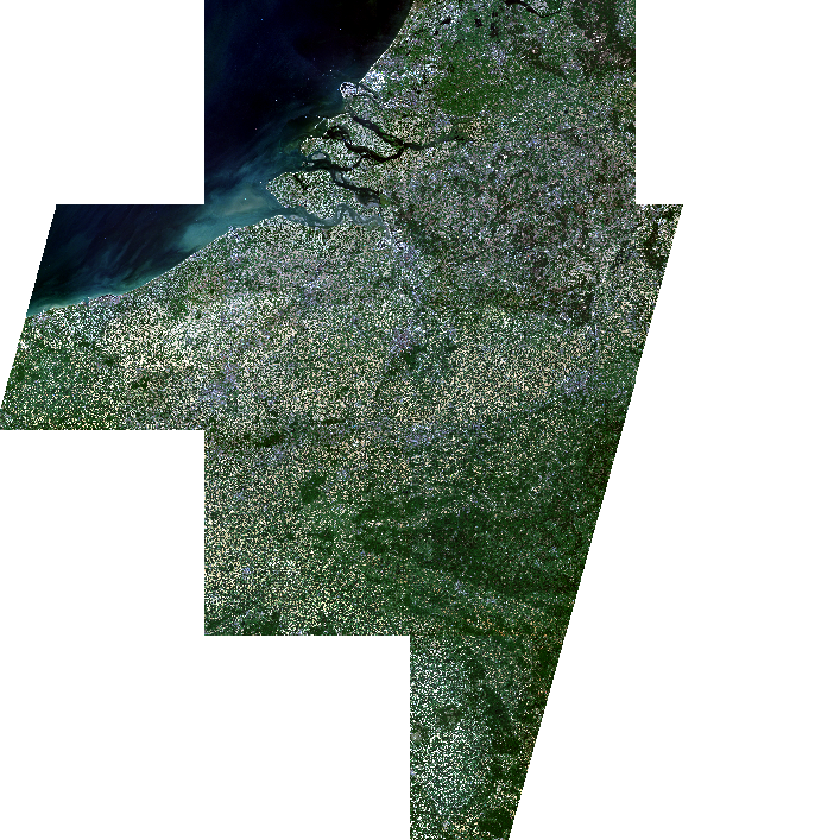

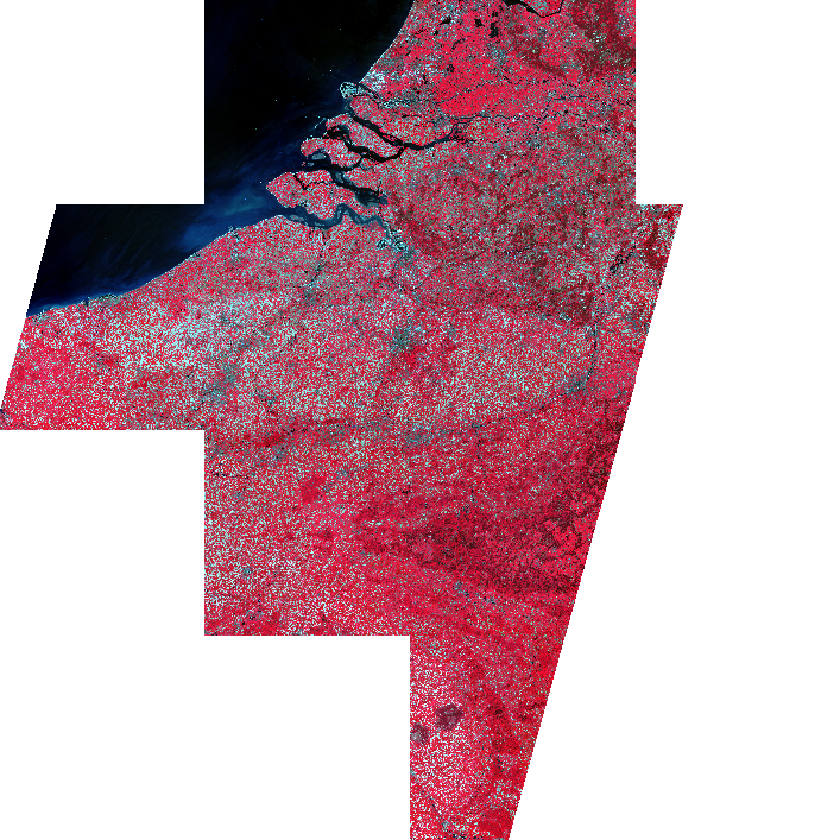

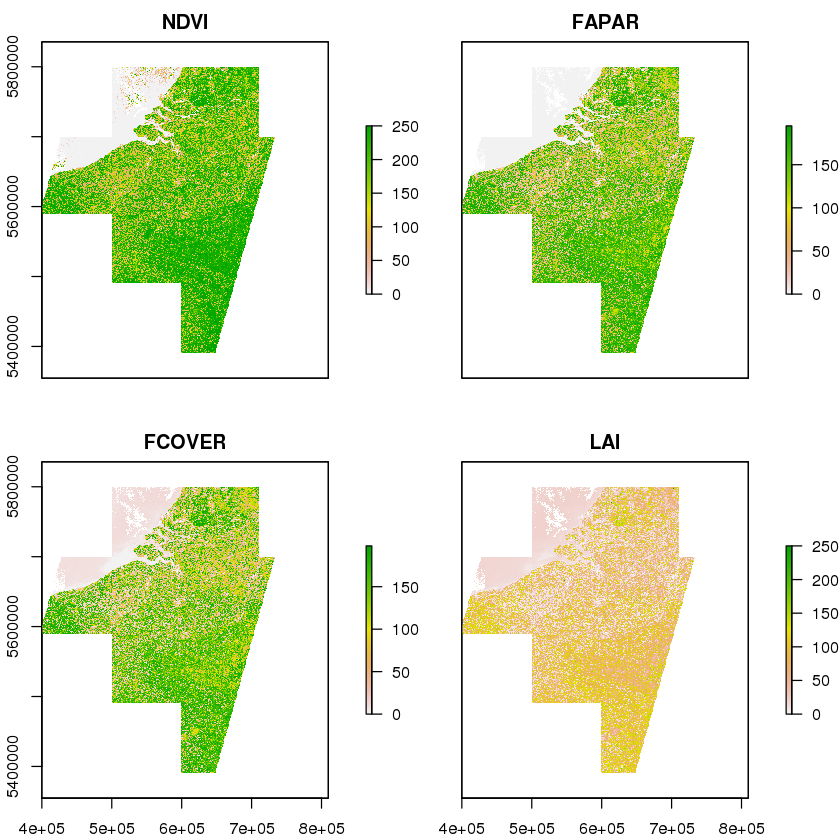

In [8]:
#TOC
im_RGBNIR <- stack("RGBNIR.vrt")
names(im_RGBNIR)<- c("B","G","R","NIR")

#RGB composites
plotRGB(im_RGBNIR,3,2,1,scale=10000,stretch="lin") #True Colour Composite with R=B4, G=B3, B=B2

plotRGB(im_RGBNIR,4,3,2,scale=10000,stretch="lin") #False Colour Composite with R=B8, G=B4, B=B3

#Biopar
im_Biopar <- stack(c(raster("NDVI.vrt"),raster("FAPAR.vrt"),raster("FCOVER.vrt"),raster("LAI.vrt")))
names(im_Biopar) <- c("NDVI","FAPAR","FCOVER","LAI")
plot(im_Biopar)               
